# Import Libraries

In this section, we import the necessary libraries to the project.

In [1731]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import random
random.seed(54)
import warnings
warnings.filterwarnings('ignore')


# Data Information 

This section includes subtitles like reading CSV data file using pandas library, dropping unnamed and nan values, and showing statistical result for data.

**Read csv file**

In [1732]:
df=pd.read_csv('mobil.csv', sep='\t')

**Read 5 rows**

In [1733]:
df.head()

,Unnamed: 0,Unnamed: 0.1,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,...,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,0,0,1325,Yok,"1,9",Yok,"2,0",Yok,50,"0,1",...,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1,1,1046,Var,"2,8",Var,0.0,Var,58,"0,2",...,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,2,2,843,Yok,"1,3",Var,1.0,Yok,16,"0,9",...,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,3,3,894,Yok,"0,5",Var,"1,0",Var,50,"0,5",...,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,4,4,936,Yok,"1,0",Yok,1.0,Yok,18,"0,2",...,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


**Drop unnamed columns from data frame**

In [1734]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]   

In [1735]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,"1,9",Yok,"2,0",Yok,50,"0,1",146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,"2,8",Var,0.0,Var,58,"0,2",100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,"1,3",Var,1.0,Yok,16,"0,9",119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,"0,5",Var,"1,0",Var,50,"0,5",199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,"1,0",Yok,1.0,Yok,18,"0,2",153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


**Show data frame shape**

In [1736]:
df.shape

(2017, 20)

**Show data frame columns**

In [1737]:
df.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'],
      dtype='object')

**Data Types**

In [1738]:
df.dtypes

BataryaGucu              int64
Bluetooth               object
MikroislemciHizi        object
CiftHat                 object
OnKameraMP              object
4G                      object
DahiliBellek             int64
Kalinlik                object
Agirlik                  int64
CekirdekSayisi           int64
ArkaKameraMP             int64
CozunurlukYükseklik      int64
CozunurlukGenislik       int64
RAM                    float64
BataryaOmru              int64
3G                      object
Dokunmatik              object
WiFi                    object
FiyatAraligi            object
Renk                    object
dtype: object

**Replacing comma and blank space in data**

As you saw above, 'MikroislemciHizi', 'OnKameraMP' and 'Kalinlik' features are string objects. String objects convert to float data types in order to apply the methods.

In [1739]:
#comma converts dot 
df["MikroislemciHizi"]=df["MikroislemciHizi"].str.replace(',' , '.')
#string object converts numeric data
df["MikroislemciHizi"] = pd.to_numeric(df["MikroislemciHizi"])

df["OnKameraMP"]=df["OnKameraMP"].str.replace(',' , '.')
df["OnKameraMP"] = pd.to_numeric(df["OnKameraMP"])

df["Kalinlik"]=df["Kalinlik"].str.replace(',' , '.')
df["Kalinlik"] = pd.to_numeric(df["Kalinlik"])

Bluetooth attribute has blank value (whitespace) category. You can see it in the below code.

In [1740]:
df["Bluetooth"].value_counts()

Yok    1009
Var     998
         10
Name: Bluetooth, dtype: int64

Replacing blank values (whitespace) with NaN in numpy array.

In [1741]:
df["Bluetooth"]=df["Bluetooth"].replace(' ' , np.nan)

**Statistical Results**

In [1742]:
df.describe()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
count,2017.000000,2017.000000,2012.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2005.000000,2017.000000
mean,1238.777392,1.521914,4.322565,32.064948,0.501785,140.164105,4.521071,9.916212,645.909767,1250.790283,2116.214963,11.002975
std,439.821621,0.815868,4.354028,18.154573,0.288549,35.392321,2.287535,6.073493,443.489410,431.963608,1080.550758,5.464259
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,2.000000
25%,852.000000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,283.000000,875.000000,1206.000000,6.000000
50%,1225.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,570.000000,1247.000000,2129.000000,11.000000
75%,1617.000000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,950.000000,1631.000000,3038.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,20.000000


**Checking null values**

In [1743]:
df.isnull().sum()

BataryaGucu             0
Bluetooth              10
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      4
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

**Drop all rows with missing value**

In [1744]:
df=df.dropna()
df.shape

(1986, 20)

##  Visualization of the Data

**Univarite Analysis**

There are two types of data. These are continuous and categorical data.

In [1745]:
continous_features=['BataryaGucu','MikroislemciHizi','DahiliBellek','Kalinlik','Agirlik','CekirdekSayisi',
                    'ArkaKameraMP','CozunurlukYükseklik','CozunurlukGenislik','RAM','BataryaOmru','OnKameraMP']

In [1746]:
categorical_features=['Bluetooth','CiftHat','4G','3G','Dokunmatik','WiFi','FiyatAraligi','Renk']

**Count plot for all the categorical features**

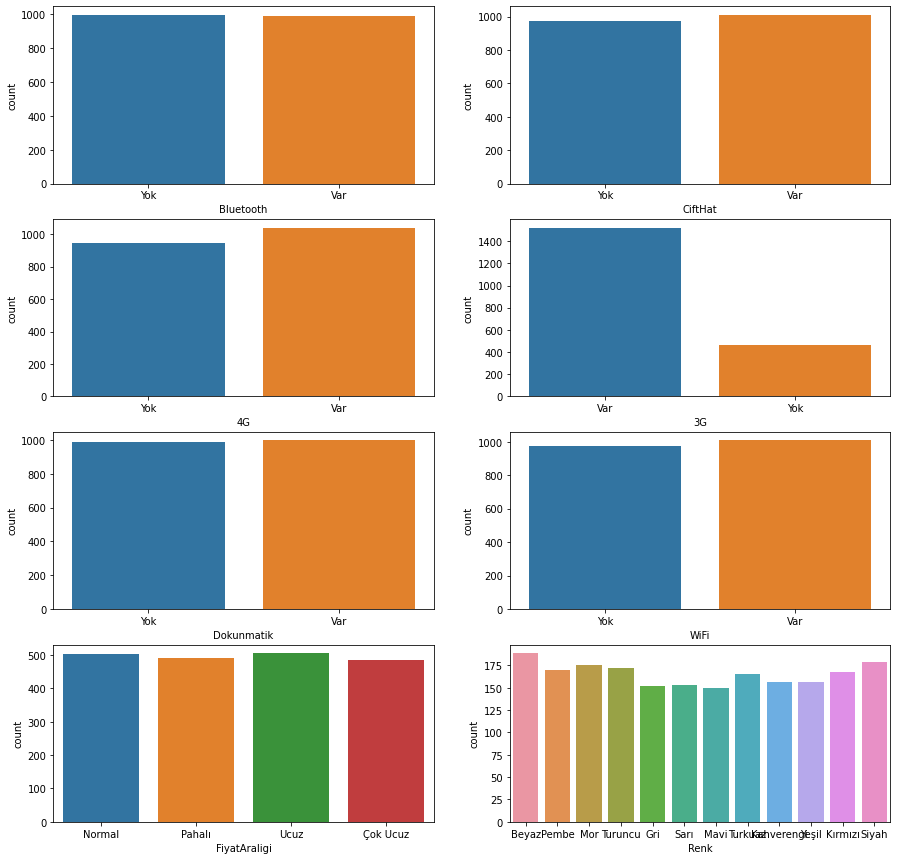

In [1747]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,15))
for i in categorical_features:
  plt.subplot(a, b, c)
  plt.xlabel(i)
  sns.countplot(df[i])
  c=c+1
    
plt.show()

**Histogram for all the continous features**

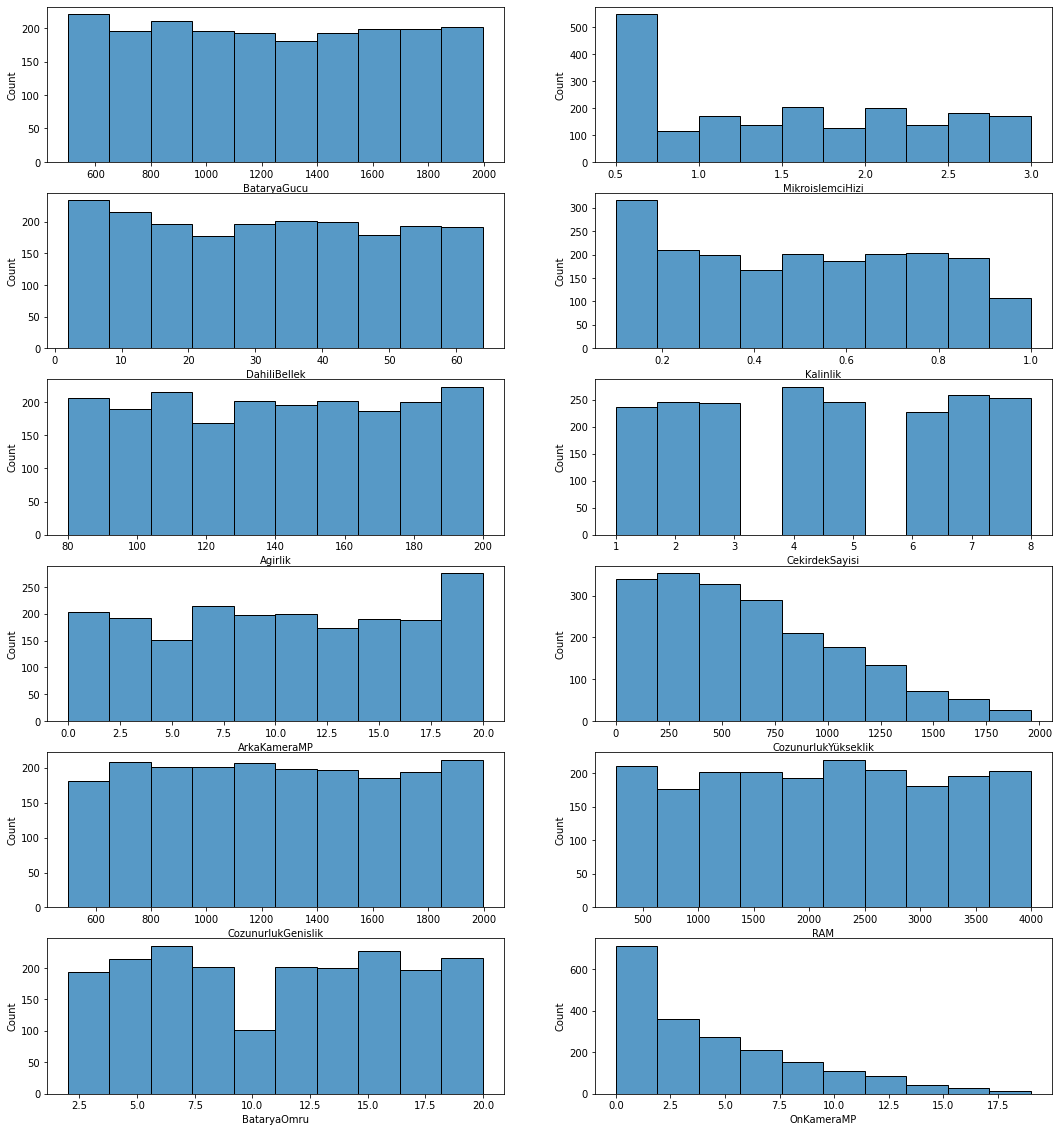

In [1748]:
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(18,20))
for i in continous_features:
  plt.subplot(a, b, c)
  plt.xlabel(i)
  sns.histplot(df[i],bins=10)
  c=c+1
    
plt.show()


## Exploratory Data Analysis

**Relationship between RAM and Fiyat Aralığı**

<AxesSubplot:xlabel='FiyatAraligi', ylabel='RAM'>

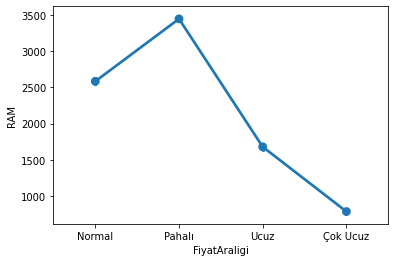

In [1749]:
sns.pointplot(y='RAM',x='FiyatAraligi',data=df)

As seen above figure, when RAM increases, the price also increases. There is a positive relationship between them.

**Relationship between Batarya Gücü and Fiyat Aralığı**

<AxesSubplot:xlabel='FiyatAraligi', ylabel='BataryaGucu'>

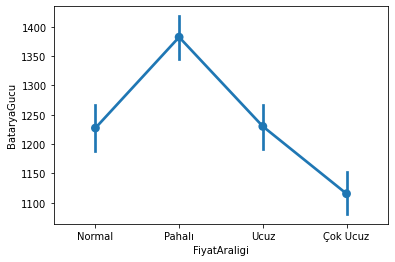

In [1750]:
sns.pointplot(x='FiyatAraligi',y='BataryaGucu',data=df)

As seen above figure, when the battery power increases, the price also increases. Box plot  also is available in below code.

<AxesSubplot:xlabel='FiyatAraligi', ylabel='BataryaGucu'>

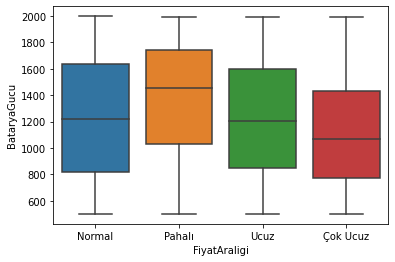

In [1751]:
sns.boxplot(x='FiyatAraligi',y='BataryaGucu',data=df)

**Relationship between Dahili Bellek and Fiyat Aralığı**

<AxesSubplot:xlabel='FiyatAraligi', ylabel='DahiliBellek'>

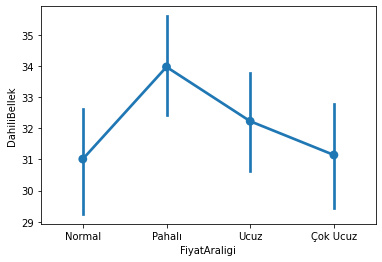

In [1752]:
 sns.pointplot(x='FiyatAraligi',y='DahiliBellek',data=df)

'Normal' and 'Çok ucuz' price ranges have the lowest internal memory. However, the 'pahallı' price range has the highest internal memory.

**Relationship between Dokunmatik, RAM and Fiyat Aralığı**

<AxesSubplot:xlabel='Dokunmatik', ylabel='RAM'>

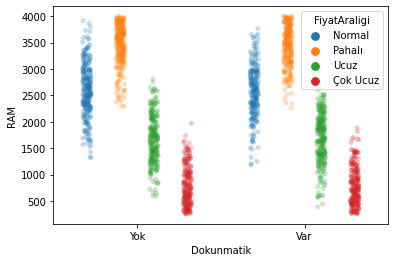

In [1753]:
sns.stripplot(x="Dokunmatik", y="RAM", hue="FiyatAraligi",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

RAM that is the highest capacity has the highest price regardless touch-operated.

**Relationship between Çift Hat and RAM**

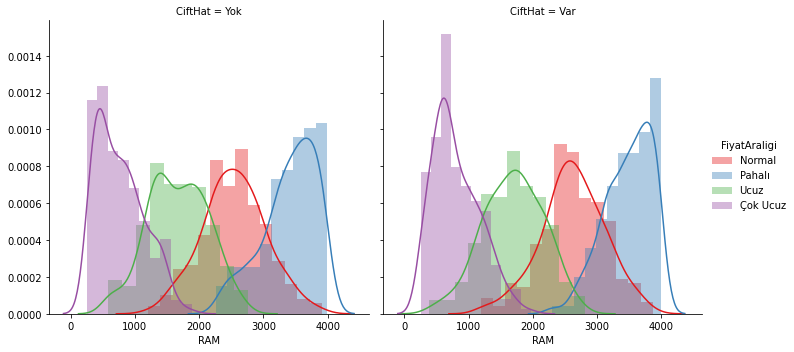

In [1754]:
g = sns.FacetGrid(df, col="CiftHat", hue="FiyatAraligi", palette="Set1",height=5 )
g = (g.map(sns.distplot, "RAM").add_legend())

Mobile phones having dual sim with high RAM costs high.

**3G supported phones**

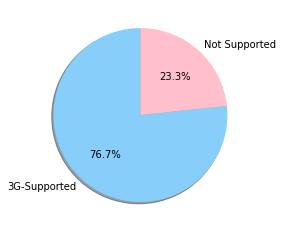

In [1755]:
labels = ["3G-Supported","Not Supported"]
values = df['3G'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['lightskyblue', 'pink']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

We can see it clearly in pie graphic that the percentage of 3G supported is 76.3% in mobile devices.

**4G supportted phones**

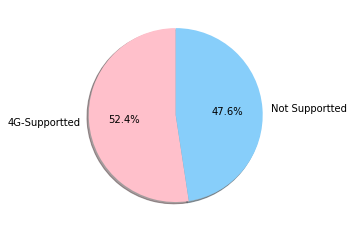

In [1756]:
labels = ["4G-Supportted","Not Supportted"]
values = df['4G'].value_counts().values
fig1, a= plt.subplots()
colors = ['pink', 'lightskyblue']
a.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

The pie graphic shows that 4G supported is 52.7% and there are slight differences between not supported 4G.

**Relationship between Ön Kamera and Arka Kamera**

Text(0.5, 0, 'MegaPixels')

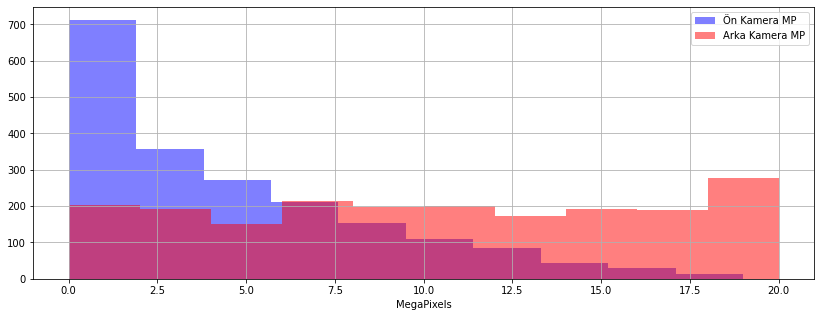

In [1757]:
plt.figure(figsize=(14,5))
df['OnKameraMP'].hist(alpha=0.5,color='blue',label='Ön Kamera MP')
df['ArkaKameraMP'].hist(alpha=0.5,color='red',label='Arka Kamera MP')
plt.legend()
plt.xlabel('MegaPixels')

The figure shows that the number of megapixels in primary camera is more than front camera.

**Relationship between Batarya Gucu and Bluetooth**

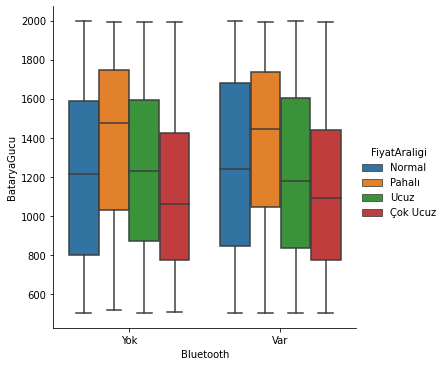

In [1758]:
sns.catplot(x='Bluetooth', y='BataryaGucu', hue='FiyatAraligi', kind = 'box', data =df )

Mobile phones having bluetooth with high battery power costs high.

## Preprocessing

**Label encoding for categorical features**

Bluetooth, CiftHat, 4G, 3G, Wifi, FiyatAraligi and Renk features are categorical. Therefore, we assigned numerical values to categorical data.

In [1759]:
# creating labelencoder
labelencoder = LabelEncoder()

df['Bluetooth_Cat'] = labelencoder.fit_transform(df['Bluetooth']) 
df['CiftHat_Cat'] = labelencoder.fit_transform(df['CiftHat']) 
df['4G_Cat'] = labelencoder.fit_transform(df['4G']) 
df['3G_Cat'] = labelencoder.fit_transform(df['3G']) 
df['Dokunmatik_Cat'] = labelencoder.fit_transform(df['Dokunmatik']) 
df['WiFi_Cat'] = labelencoder.fit_transform(df['WiFi']) 
df['FiyatAraligi_Cat'] = labelencoder.fit_transform(df['FiyatAraligi']) 
df['Renk_Cat'] = labelencoder.fit_transform(df['Renk']) 

df

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,FiyatAraligi,Renk,Bluetooth_Cat,CiftHat_Cat,4G_Cat,3G_Cat,Dokunmatik_Cat,WiFi_Cat,FiyatAraligi_Cat,Renk_Cat
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,...,Normal,Beyaz,1,1,1,0,1,1,0,0
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,...,Pahalı,Pembe,0,0,0,0,0,0,1,6
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,...,Ucuz,Mor,1,0,1,1,1,0,2,5
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,...,Pahalı,Turuncu,1,0,0,0,1,0,1,10
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,...,Normal,Beyaz,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,936,Var,2.3,Yok,5.0,Var,57,0.2,129,2,...,Ucuz,Turkuaz,0,1,0,0,0,1,2,9
2013,1008,Yok,0.8,Yok,11.0,Yok,61,1.0,114,3,...,Ucuz,Mavi,1,1,1,0,1,1,2,4
2014,1977,Yok,1.3,Var,2.0,Yok,31,0.4,173,8,...,Pahalı,Mor,1,0,1,1,1,1,1,5
2015,1103,Yok,1.0,Var,6.0,Yok,29,0.7,111,6,...,Ucuz,Pembe,1,0,1,1,0,0,2,6


**Resample**

In [1760]:
df['FiyatAraligi'].value_counts().unique

<bound method Series.unique of Ucuz        506
Normal      504
Pahalı      492
Çok Ucuz    484
Name: FiyatAraligi, dtype: int64>

As seen in the above result, 'Ucuz', 'Normal', 'Çok Ucuz' and 'Pahallı' price ranges have 506, 504, 494, and 492 samples respectively. Data is unbalanced. To solve this problem, we need to use the resampling method. The purpose of this approach is to provide that each label has the same size.In the resampling method, there are 2 different approaches. These 
are under-sampling and over-sampling. For this problem, we preferred to use the over-sampling method.

In [1761]:
def Resample(df):
    label_0=df[df.FiyatAraligi_Cat==0] #Normal
    label_1=df[df.FiyatAraligi_Cat==1] #Pahallı
    label_2=df[df.FiyatAraligi_Cat==2] #Ucuz
    label_3=df[df.FiyatAraligi_Cat==3] #Çok Ucuz
   
    # upsample minority
    label_0_upsampled = resample(label_0,
                              replace=True, # sample with replacement
                              n_samples=len(label_2), # match number in majority class
                              random_state=27) # reproducible results
     # upsample minority
    label_1_upsampled = resample(label_1,
                              replace=True, # sample with replacement
                              n_samples=len(label_2), # match number in majority class
                              random_state=27) # reproducible results
     # upsample minority
    label_3_upsampled = resample(label_3,
                              replace=True, # sample with replacement
                              n_samples=len(label_2), # match number in majority class
                              random_state=27) # reproducible results
    
    # combine majority and upsampled minority
    upsampled = pd.concat([label_2, label_0_upsampled, label_1_upsampled, label_3_upsampled])
    return upsampled

Call the resample function

In [1762]:
df=Resample(df)

After the resampling method, each price range has the same sample size. You can see it in the below code.

In [1763]:
df['FiyatAraligi'].value_counts().unique

<bound method Series.unique of Çok Ucuz    506
Normal      506
Pahalı      506
Ucuz        506
Name: FiyatAraligi, dtype: int64>

<AxesSubplot:xlabel='FiyatAraligi', ylabel='count'>

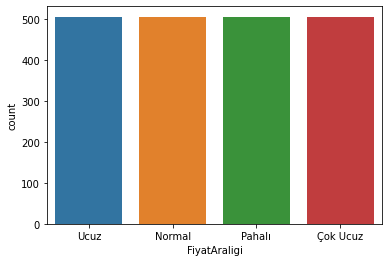

In [1764]:
sns.countplot(df['FiyatAraligi'])

**Normalization**

Using z-normalization in order to scaling the values

In [1765]:
def normalize(x):

  z=(x-x.mean())/x.std()

  return z

We dropped categorical columns and price range labels in data frame

In [1766]:
col=['BataryaGucu', 'Bluetooth_Cat', 'MikroislemciHizi', 'CiftHat_Cat', 'OnKameraMP',
       '4G_Cat', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G_Cat', 'Dokunmatik_Cat', 'WiFi_Cat', 'Renk_Cat']

X=df[col] #data frame without categorical and classification label
labels=df['FiyatAraligi_Cat'] #classification labels

Normalized data frame

In [1767]:
X=normalize(X)

After normalization, the variance is 1.

In [1768]:
X.var()


BataryaGucu            1.0
Bluetooth_Cat          1.0
MikroislemciHizi       1.0
CiftHat_Cat            1.0
OnKameraMP             1.0
4G_Cat                 1.0
DahiliBellek           1.0
Kalinlik               1.0
Agirlik                1.0
CekirdekSayisi         1.0
ArkaKameraMP           1.0
CozunurlukYükseklik    1.0
CozunurlukGenislik     1.0
RAM                    1.0
BataryaOmru            1.0
3G_Cat                 1.0
Dokunmatik_Cat         1.0
WiFi_Cat               1.0
Renk_Cat               1.0
dtype: float64

## Feature Extraction

We derivated new features from existing features. The objective is to create ones that do a better representing a machine learning problem to the model. By doing so, we can improve the accuracy of the model.In addition, we extracted four different new features, you can see it in the below.These features are total pixel resolution height and width, internal memory per ram, microprocessor speed per ram, and battery.

In [1769]:
X['toplamCozunurluk'] = X['CozunurlukYükseklik'] * X['CozunurlukGenislik']
X['toplamCozunurluk']=X['toplamCozunurluk'].round(2)

X['DahiliBellek_per_RAM'] = X['DahiliBellek'] / X['RAM'] 
X['DahiliBellek_per_RAM']=X['DahiliBellek_per_RAM'].round(2)

X['MikroislemciHizi_per_RAM'] = X['MikroislemciHizi'] / X['RAM'] 
X['MikroislemciHizi_per_RAM']=X['MikroislemciHizi_per_RAM'].round(2)

X['Batarya']=X['BataryaGucu'] * X['BataryaOmru']
X['Batarya']=X['Batarya'].round(2)

X

,BataryaGucu,Bluetooth_Cat,MikroislemciHizi,CiftHat_Cat,OnKameraMP,4G_Cat,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,RAM,BataryaOmru,3G_Cat,Dokunmatik_Cat,WiFi_Cat,Renk_Cat,toplamCozunurluk,DahiliBellek_per_RAM,MikroislemciHizi_per_RAM,Batarya
2,-0.876415,0.993843,-0.280329,-1.017696,-0.751643,1.056694,-0.884730,1.384098,-0.571997,1.052611,...,-0.368179,0.586173,1.793064,1.015686,-0.989922,-0.130178,0.13,2.40,0.76,-0.51
5,-0.153461,0.993843,-0.649961,0.982126,-0.981973,1.056694,0.994045,-0.013290,-0.996651,-0.257113,...,-0.672915,0.769943,-0.557429,-0.984070,-0.989922,-1.565253,0.64,-1.48,0.97,-0.12
15,-0.337033,-1.005698,0.458936,-1.017696,2.012310,-0.945880,0.551980,-1.410679,-1.081582,1.052611,...,0.298546,-0.700212,-0.557429,1.015686,1.009681,1.591913,1.31,1.85,1.54,0.24
16,-0.502474,0.993843,-0.896382,0.982126,1.551651,1.056694,1.601884,1.733445,-0.713548,-0.693688,...,-0.114233,0.034865,-0.557429,1.015686,1.009681,-0.417193,-0.32,-14.02,7.85,-0.02
22,1.482818,0.993843,-0.649961,-1.017696,-0.290984,1.056694,-0.442665,-0.013290,0.277312,0.616036,...,-0.680302,-0.332673,-0.557429,-0.984070,-0.989922,1.591913,-0.23,0.65,0.96,-0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,-1.486054,-1.005698,0.582146,-1.017696,-0.981973,-0.945880,-0.332149,-0.013290,-0.600307,0.616036,...,-0.766182,-1.619059,-0.557429,1.015686,-0.989922,-0.704208,-0.14,0.43,-0.76,2.41
70,-0.062808,-1.005698,1.074989,-1.017696,-0.981973,1.056694,-0.718956,-1.410679,-0.487066,-1.130263,...,-1.419979,-1.435290,1.793064,1.015686,1.009681,-0.991223,-0.59,0.51,-0.76,0.09
1772,-0.715507,-1.005698,-0.773172,0.982126,-0.521314,1.056694,-1.547827,1.034751,-1.109893,-1.130263,...,-1.223286,-1.067751,-0.557429,-0.984070,1.009681,0.156837,-0.55,1.27,0.63,0.76
911,-0.189722,0.993843,1.814254,0.982126,0.169675,-0.945880,1.380852,-0.362637,-0.798479,0.179462,...,-1.700705,0.034865,-0.557429,-0.984070,-0.989922,-0.704208,2.02,-0.81,-1.07,-0.01


**Correlation Matrix**

Correlation declares how the features are related to each other or the target variable. Correlation can be positive or negative. Heatmap makes it easy to identify which features are most related to the target variable.

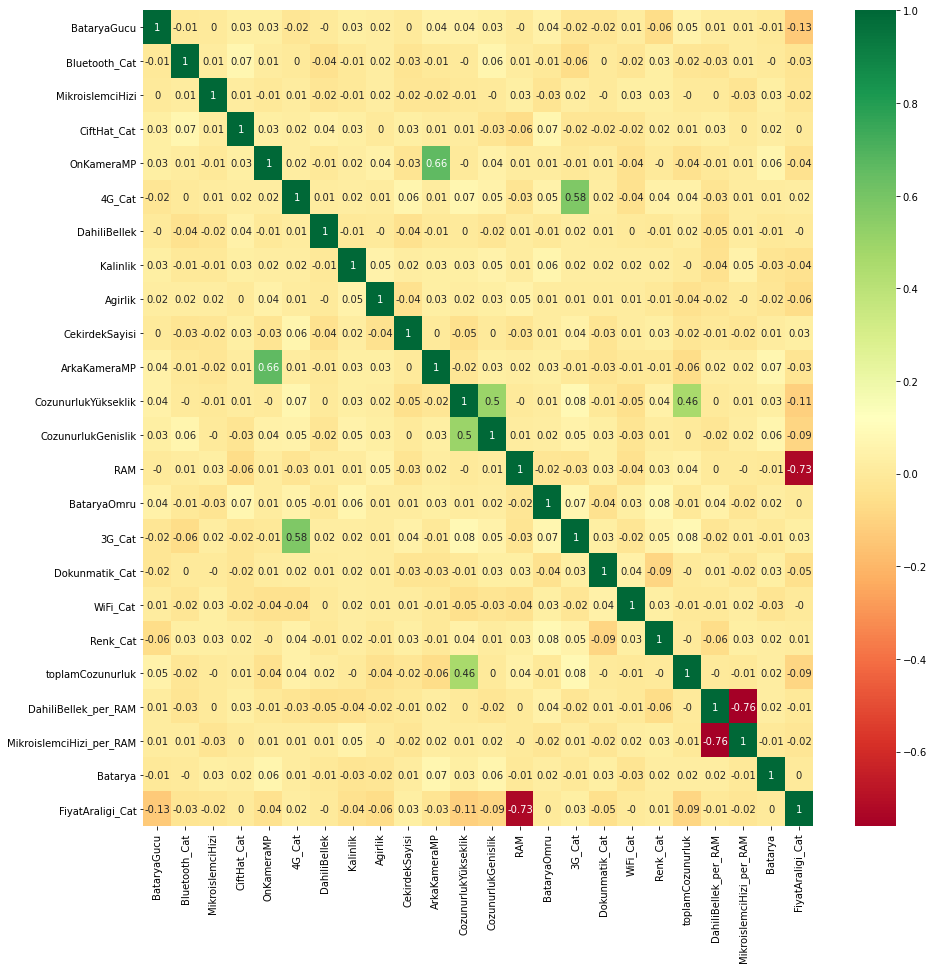

In [1770]:
cormat=pd.concat([X, df[['FiyatAraligi_Cat']]], axis=1)
corr=cormat.corr().round(2)
fig=plt.figure(figsize=(15,15))
fig=sns.heatmap(corr,annot=True,cmap="RdYlGn")

There is no significant correlated in heat map. RAM is the least correlated with price range.

## Cross Validation

We split the data into the proportion of 80%  train and 20% test. Also, each class sample is split with this rate. We used the train_test_split of the sci-kit learn method for this task.

In [1771]:
#split train and test data x_train=train data,x_test=test data, y_train=train labels, y_test=test_labels 
#%20 test %80 train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1,stratify=labels)

## Classification

We used six different machine learning algorithms to train and test the dataset. These algorithms are  Logistic Regression,Random Forest, Naive Bayes, Decision Tree, K-Nearest Neighbor, and Support Vector Machine.  The purpose of using different machine learning algorithms is to compare the results and measure the performance of the model.

**1.Logistic Regression**

In [1772]:
#create a Logistic Regression Model
lr = LogisticRegression(penalty='l2',C=0.1)

#fit model
lr.fit(x_train,y_train)
#predict test 
y_test_pred1 = lr.predict(x_test)
#calculate classification accuracy
lr_acc=accuracy_score(y_test_pred1,y_test)

#Print classification results
print("Classification Accuracy:"+str(round(lr_acc*100,2)))
print("\n0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz")
print("Confusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Classification Accuracy:91.6

0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz
Confusion Matrix:
[[ 85   2   5   0]
 [  8 100   0   0]
 [  8   0  86   1]
 [  0   0  10 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        92
           1       0.98      0.93      0.95       108
           2       0.85      0.91      0.88        95
           3       0.99      0.91      0.95       110

    accuracy                           0.92       405
   macro avg       0.92      0.92      0.91       405
weighted avg       0.92      0.92      0.92       405



**2.Random Forest**

In [1773]:
#create a random forest model
rf = RandomForestClassifier(n_estimators=100,random_state=4)
#fit model
rf.fit(x_train,y_train)
#predict test data
y_test_pred2 = rf.predict(x_test)
#calculate classification accuray
rf_acc=accuracy_score(y_test_pred2,y_test)

#print classification result
print("Classification Accuracy:"+str(round(rf_acc*100,2)))
print("\n0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz")
print("Confusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))

Classification Accuracy:93.33

0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz
Confusion Matrix:
[[89  3  4  0]
 [ 5 99  0  0]
 [ 7  0 93  4]
 [ 0  0  4 97]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        96
           1       0.97      0.95      0.96       104
           2       0.92      0.89      0.91       104
           3       0.96      0.96      0.96       101

    accuracy                           0.93       405
   macro avg       0.93      0.93      0.93       405
weighted avg       0.93      0.93      0.93       405



**3. K-Neighbors Classifier**

In [1774]:
#create a KNeighboors Classifier model
knn=KNeighborsClassifier(n_neighbors=5)
#fit model
knn.fit(x_train,y_train)
#predict test data
y_test_pred3 = knn.predict(x_test)
#calculate classification accuracy
knn_acc=accuracy_score(y_test_pred3,y_test)

#print classification results
print("Classification Accuracy:"+str(round(knn_acc*100,2)))
print("\n0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz")
print("Confusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Classification Accuracy:76.54

0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz
Confusion Matrix:
[[66 10 11  1]
 [17 92  5  0]
 [16  0 59  7]
 [ 2  0 26 93]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.75      0.70        88
           1       0.90      0.81      0.85       114
           2       0.58      0.72      0.64        82
           3       0.92      0.77      0.84       121

    accuracy                           0.77       405
   macro avg       0.77      0.76      0.76       405
weighted avg       0.79      0.77      0.77       405



**4.Naive Bayes**

In [1775]:
#create a naive bayes model
nb = GaussianNB()
#fit model
nb.fit(x_train,y_train)
#predict test data 
y_test_pred4 = nb.predict(x_test)
#calculate classification accuracy
nb_acc=accuracy_score(y_test_pred4,y_test)

#print classification results
print("Classification Accuracy:"+str(round(nb_acc*100,2)))
print("\n0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz")
print("Confusion Matrix:\n%s"%confusion_matrix(y_test_pred4,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))

Classification Accuracy:61.73

0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz
Confusion Matrix:
[[ 44   2  36   0]
 [ 48 100   1   0]
 [  3   0   5   0]
 [  6   0  59 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.54      0.48        82
           1       0.98      0.67      0.80       149
           2       0.05      0.62      0.09         8
           3       1.00      0.61      0.76       166

    accuracy                           0.62       405
   macro avg       0.62      0.61      0.53       405
weighted avg       0.86      0.62      0.70       405



**5.Decision Tree**

In [1776]:
#create a decision tree model
dtc = DecisionTreeClassifier(random_state=42)
#fit model
dtc.fit(x_train, y_train)
#predict test data
y_test_pred5 = dtc.predict(x_test)
#calculate classification accuracy
dtc_acc=accuracy_score(y_test_pred5,y_test)

#Print classification results
print("Classification Accuracy:"+str(round(dtc_acc*100,2)))
print("\n0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz")
print("Confusion Matrix:\n%s"%confusion_matrix(y_test_pred5,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred5,y_test))

Classification Accuracy:89.38

0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz
Confusion Matrix:
[[85  6  8  0]
 [ 8 96  0  0]
 [ 8  0 85  5]
 [ 0  0  8 96]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        99
           1       0.94      0.92      0.93       104
           2       0.84      0.87      0.85        98
           3       0.95      0.92      0.94       104

    accuracy                           0.89       405
   macro avg       0.89      0.89      0.89       405
weighted avg       0.90      0.89      0.89       405



**6.Support Vector Machine**

In [1777]:
#create a support vector model
svc = SVC(kernel = 'rbf', random_state = 42)
#fit model
svc.fit(x_train, y_train)
#predict test data
y_test_pred6 = svc.predict(x_test)
#calculate classification accuracy
svc_acc=accuracy_score(y_test_pred6,y_test)

#Print classification results
print("Classification Accuracy:"+str(round(svc_acc*100,2)))
print("\n0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz")
print("Confusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Classification Accuracy:51.36

0:Normal, 1:Pahallı, 2:Ucuz, 3:Çok Ucuz
Confusion Matrix:
[[  4   0   5   0]
 [ 54 102   2   0]
 [  1   0   1   0]
 [ 42   0  93 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.44      0.07         9
           1       1.00      0.65      0.78       158
           2       0.01      0.50      0.02         2
           3       1.00      0.43      0.60       236

    accuracy                           0.51       405
   macro avg       0.51      0.50      0.37       405
weighted avg       0.97      0.51      0.66       405



## Comparing Accuracy of Model

Random Forest has the highest accuracy when we compare other algorithms. The accuracy is 93.33%. As seen in the figure, Logistic Regression, Decision Tree, KNN, Naive Bayes, and SVM follow the Random Forest respectively.

Text(0.5, 1.0, 'Model Accuracies')

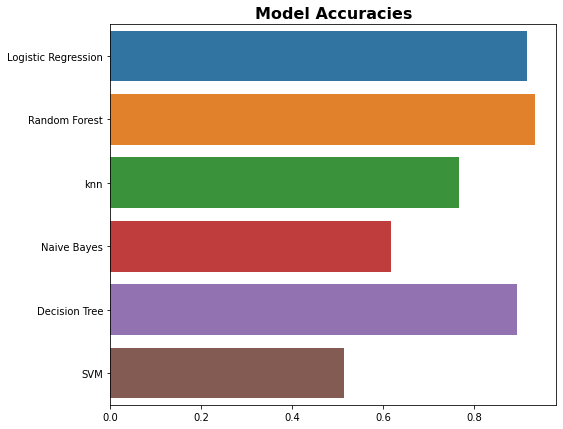

In [1778]:
plt.figure(figsize= (8,7))
ac = [lr_acc,rf_acc,knn_acc,nb_acc,dtc_acc,svc_acc]
name = ['Logistic Regression','Random Forest','knn','Naive Bayes','Decision Tree','SVM']
sns.barplot(x = ac,y = name)
plt.title("Model Accuracies", fontsize=16, fontweight="bold")

## Result

We visualized the data and analyzed it. We applied some preprocessing techniques to  features such as cleaning data ,normalization, and resampling.In addition, we extracted new features from existing features. Using these features,  we splitted data into 80% train and 20% test samples. We analyzed the classification performance of  features. To improve the results, I have some ideas. Instead of using all samples in data, we can use any dimension reduction technique like PCA. Thus, it provides time efficiency and can improve classification results. Also, other sampling methods can be used to balance the data. Last, SVM algorithm has a lower accuracy result than other algorithms. 
To improve model performance, grid search method can be used.